In [121]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

In [168]:
E_radius = 6400
min_height = 7000
max_height = 100000
angle_low = np.deg2rad(10)
angle_high = np.deg2rad(75)
ra = np.deg2rad(90)

In [169]:
def draw_cone(xe, ye, theta):
    x_high1 = xe+ max_height*np.cos(theta) - max_height*np.tan(ra-angle_high)*np.sin(theta)
    y_high1 = ye+max_height*np.sin(theta) + max_height*np.tan(ra-angle_high)*np.cos(theta)
    x_high2 = xe+max_height*np.cos(theta) - max_height*np.tan(-ra+angle_high)*np.sin(theta)
    y_high2 = ye+max_height*np.sin(theta) + max_height*np.tan(-ra+angle_high)*np.cos(theta)
    x_low1 = xe + max_height*np.cos(theta) - max_height*np.tan(ra-angle_low)*np.sin(theta)
    y_low1 = ye + max_height*np.sin(theta) + max_height*np.tan(ra-angle_low)*np.cos(theta)
    x_low2 = xe + max_height*np.cos(theta) - max_height*np.tan(-ra+angle_low)*np.sin(theta)
    y_low2 = ye + max_height*np.sin(theta) + max_height*np.tan(-ra+angle_low)*np.cos(theta)
    return x_high1, y_high1, x_high2, y_high2, x_low1, y_low1, x_low2, y_low2

In [170]:
n_points = 3600
theta = np.linspace(0, 2*np.pi, n_points)
x_e = E_radius * np.cos(theta)
y_e = E_radius * np.sin(theta)
x_o = (E_radius+min_height) * np.cos(theta)
y_o = (E_radius+min_height) * np.sin(theta)

<IPython.core.display.Javascript object>


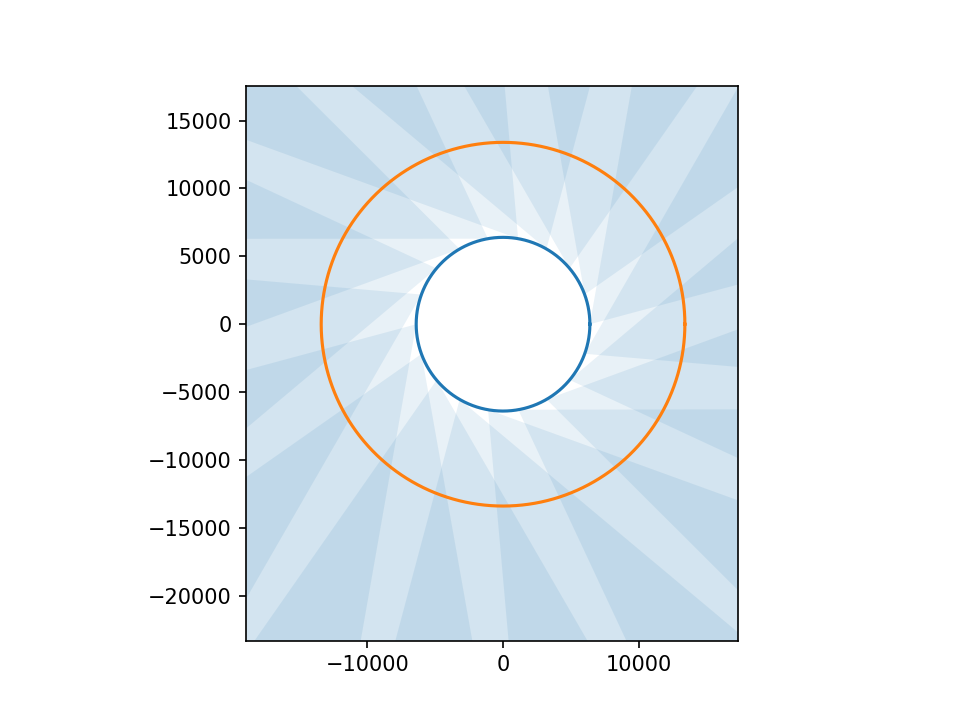

In [182]:
plt.plot(x_e,y_e)
plt.plot(x_o,y_o)
n_sats = 18
patches = []
patches2= []
for i in range(0,n_points,n_points//n_sats):
    x1, y1, x2, y2, x3, y3, x4, y4 = draw_cone(x_e[i], y_e[i], theta[i])
    #plt.plot((x_e[i],x1), (y_e[i],y1))
    #plt.plot((x_e[i],x2), (y_e[i],y2))
    #plt.plot((x_e[i],x3), (y_e[i],y3))
    #plt.plot((x_e[i],x4), (y_e[i],y4))
    patches.append(Polygon([[x_e[i],y_e[i]],[x1,y1],[x3,y3]]))
    #patches.append(Polygon([[x_e[i],y_e[i]],[x2,y2],[x4,y4]]))

plt.gca().add_collection(PatchCollection(patches, alpha=0.1))

plt.xlim([-60000,60000])
plt.ylim([-60000,60000])
plt.gca().set_aspect('equal', adjustable='box')

In [180]:
x_e[i], y_e[i], theta[i]

(8.37990576738405, -6399.994513839783, 4.713698341034977)

In [173]:
%matplotlib notebook